In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/drive/My Drive/Projects/House Price Prediction/Bengaluru_House_Data.csv")

In [5]:
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [7]:
df.shape

(13320, 9)

In [15]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [23]:
df1=df.drop(['availability','society','area_type','balcony'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [24]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [25]:
df2=df1.dropna()

In [26]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [27]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [28]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(" ")[0]))

<ipython-input-28-da819e3991c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: int(x.split(" ")[0]))


In [33]:
df2.head()
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [34]:
df2[df2['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [35]:
df2.drop(['size'],axis="columns",inplace=True)

<ipython-input-35-d8893d32f33a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['size'],axis="columns",inplace=True)


In [37]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [40]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [43]:
df2[~df2['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [50]:
def convert_to_num(x):
  l=x.split("-")
  if len(l)==2:
    return (float(l[0])+float(l[1]))/2
  try:
    return float(x)
  except:
    return None

In [45]:
df3=df2.copy()

In [56]:
df3['total_sqft']=df3['total_sqft'].apply(convert_to_num)

In [61]:
df3.isna().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [62]:
df4=df3.copy()

In [63]:
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']

In [64]:
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [66]:
len(df4['location'].unique())

1304

In [67]:
df4['location']=df4['location'].apply(lambda x:x.strip(" "))

In [72]:
location_categ=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [78]:
len(location_categ[location_categ<=10])
location_less_than_10=location_categ[location_categ<=10]

In [79]:
df4['location']=df['location'].apply(lambda x:"other" if x in location_less_than_10 else x)


In [86]:
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [89]:
df5=df4[~(df4['total_sqft']/df4['bhk']<300)]

In [91]:
df5['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [96]:
def remove_outliers(df):
  df_out=pd.DataFrame()
  for location,location_df in df.groupby('location'):
    m=np.mean(location_df.price_per_sqft)
    sd=np.std(location_df.price_per_sqft)
    reduced_df=location_df[(location_df['price_per_sqft']>(m-sd))&(location_df['price_per_sqft']<(m+sd))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

In [97]:
df6=remove_outliers(df5)

In [98]:
df6

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Devarabeesana Halli,1672.0,3.0,150.00,3,8971.291866
1,Devarabeesana Halli,1750.0,3.0,149.00,3,8514.285714
2,Devarabeesana Halli,1750.0,3.0,150.00,3,8571.428571
3,Devarachikkanahalli,1250.0,2.0,44.00,3,3520.000000
4,Devarachikkanahalli,1250.0,2.0,40.00,2,3200.000000
...,...,...,...,...,...,...
10187,other,1353.0,2.0,110.00,2,8130.081301
10188,other,812.0,1.0,26.00,1,3201.970443
10189,other,1440.0,2.0,63.93,3,4439.583333
10190,other,1075.0,2.0,48.00,2,4465.116279


In [101]:
import matplotlib.pyplot as plt
def plot_scatter_plot(df,location):
  bhk2=df[(df['location']==location)&(df['bhk']==2)]
  bhk3=df[(df['location']==location)&(df['bhk']==3)]
  plt.scatter(bhk2['total_sqft'],bhk2['price'],color="blue",marker="+",label="2 BHK")
  plt.scatter(bhk3['total_sqft'],bhk3['price'],color='red',marker="*",label='3 BHK')
  plt.xlabel("Total Square Feet")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

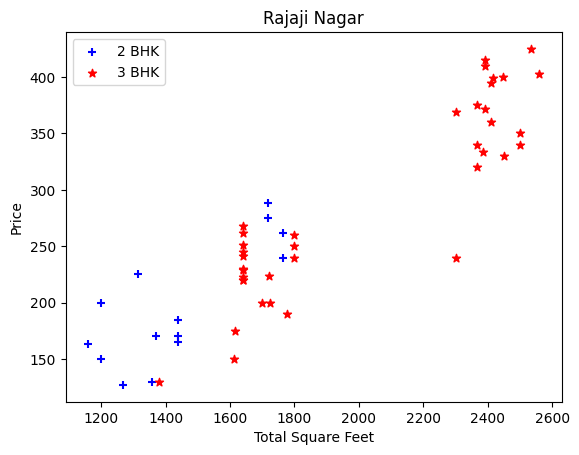

In [104]:
plot_scatter_plot(df6,"Rajaji Nagar")

In [107]:
def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby("bhk"):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df['price_per_sqft']),
          'std':np.std(bhk_df['price_per_sqft']),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices=np.append(exclude_indices,bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis="index")

In [108]:
df7=remove_bhk_outliers(df6)

In [109]:
df7.shape

(7315, 6)

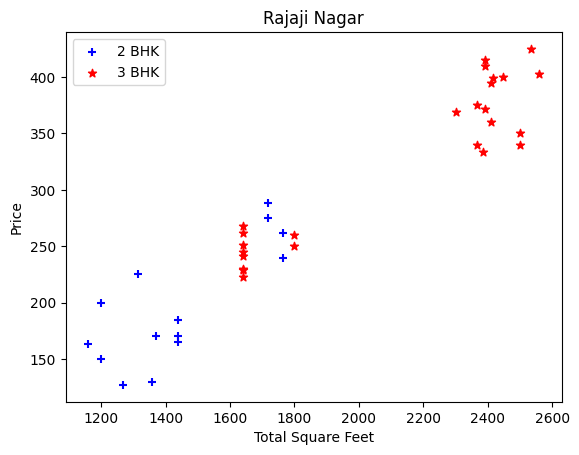

In [111]:
plot_scatter_plot(df7,"Rajaji Nagar")

Text(0, 0.5, 'Count')

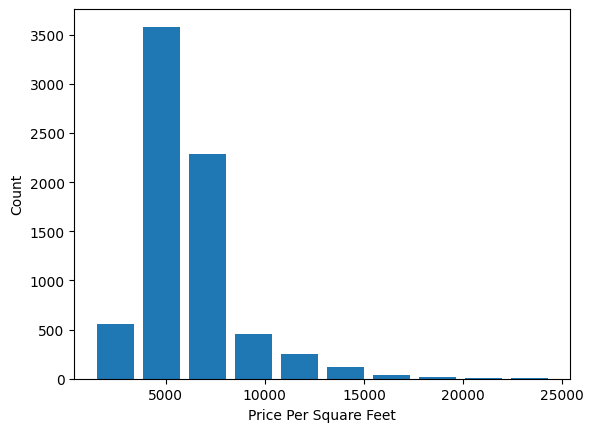

In [112]:
plt.hist(df7['price_per_sqft'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [113]:
df7.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Devarabeesana Halli,1672.0,3.0,150.0,3,8971.291866
1,Devarabeesana Halli,1750.0,3.0,149.0,3,8514.285714
2,Devarabeesana Halli,1750.0,3.0,150.0,3,8571.428571
4,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
5,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667


In [114]:
df7['bath'].unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [115]:
df7[df7['bath']>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5285,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8488,other,12000.0,12.0,525.0,10,4375.000000
8574,other,10000.0,16.0,550.0,16,5500.000000
9287,other,6000.0,12.0,150.0,11,2500.000000
9609,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

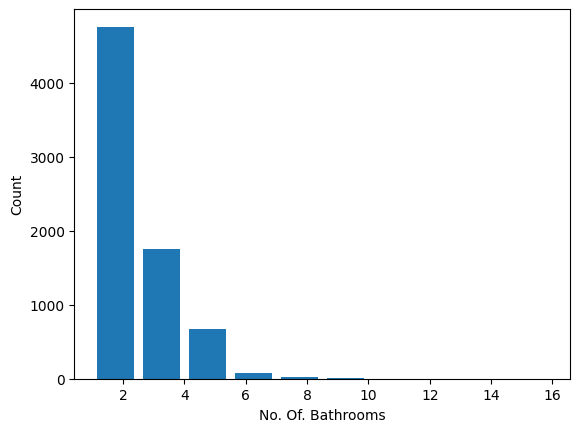

In [116]:
plt.hist(df7['bath'],rwidth=0.8)
plt.xlabel("No. Of. Bathrooms")
plt.ylabel("Count")

In [117]:
df7[df7['bath']>df7['bhk']+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1644,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5246,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6726,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8418,other,11338.0,9.0,1000.0,6,8819.897689


In [118]:
df8=df7[df7['bath']<df7['bhk']+2]

In [121]:
df8.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Devarabeesana Halli,1672.0,3.0,150.0,3,8971.291866
1,Devarabeesana Halli,1750.0,3.0,149.0,3,8514.285714
2,Devarabeesana Halli,1750.0,3.0,150.0,3,8571.428571
4,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
5,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667


In [122]:
df9=df8.drop(['price_per_sqft'],axis='columns')

In [126]:
dummies=pd.get_dummies(df9['location'])

In [127]:
df10=pd.concat([df9,dummies],axis='columns')

In [129]:
df10.drop(['other'],axis="columns",inplace=True)

In [131]:
df10.drop(['location'],axis='columns',inplace=True)

In [132]:
df10

,total_sqft,bath,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Mysore Highway,Thanisandra,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1672.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1750.0,3.0,149.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1750.0,3.0,150.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1250.0,2.0,40.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1200.0,2.0,83.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10183,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10184,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10187,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10188,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
x=df10.drop(['price'],axis='columns')
y=df10['price']

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=10,random_state=10)

In [156]:
from sklearn.linear_model import LinearRegression

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [155]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.851425,{'positive': False}
1,lasso,0.725880,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.716291,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [164]:
lr_model=LinearRegression(positive=False)
lr_model.fit(x,y)

LinearRegression()

In [162]:
def predict_price(location,sqft,bath,bhk):
  loc_index=np.where(x.columns==location)[0]
  X=np.zeros(len(x.columns))
  X[0]=sqft
  X[1]=bath
  X[2]=bhk
  if loc_index>=0:
    X[loc_index]=1
  return lr_model.predict([X])[0]

In [169]:
predict_price('Indira Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.59501620129527

In [170]:
import pickle
with open("Banglore_pred.pkl","wb") as f:
  pickle.dump(lr_model,f)

In [173]:
location_names=x.drop(['total_sqft','bath','bhk'],axis='columns')

In [179]:
columns={'data_columns':[i for i in location_names.columns]}

In [182]:
import json
with open('locations.json',"w") as f1:
  f1.write(json.dumps(columns))

In [186]:
x['total_sqft'].describe()

count     7237.000000
mean      1469.394652
std        812.025875
min        300.000000
25%       1093.000000
50%       1255.000000
75%       1652.000000
max      30000.000000
Name: total_sqft, dtype: float64